### That nasty integral

I need to solve this integral:

$$I= \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

The gaussian pdf is with mean=0 is

$$\frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right)$$

which is normalized between $-\infty$ and $+\infty$. Here we want a half Gaussian

$$p(x) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right)$$

which correctly gives $\int_0^\infty p(x) =1$. My integral then becomes

$$I = \sigma\sqrt\frac{\pi}{2} \int_0^\infty x^3 p(x) dx $$



In [1]:
import numpy as np
import scipy.stats
import pylab as plt
from tqdm.notebook import tqdm

First generate from a Gaussian

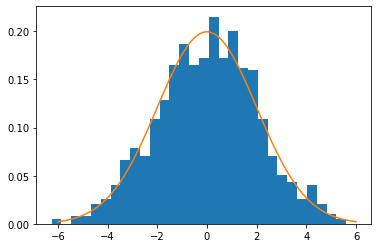

In [2]:
sigma=2
N=1000


gauss = scipy.stats.norm(loc=0,scale=sigma)

plt.hist(gauss.rvs(N),density=True,bins=30);
plt.plot(np.linspace(-3*sigma,3*sigma,100), gauss.pdf(np.linspace(-3*sigma,3*sigma,100)))

The Gaussian distribution is symmetric. To generate points from a half-gaussian it's enough to take the abs. Note I have to add a factor of 2 to the pdf

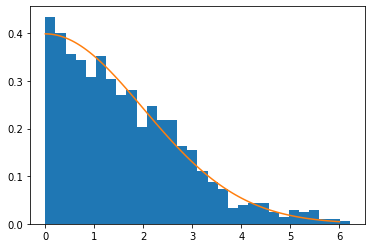

In [3]:
plt.hist(np.abs(gauss.rvs(N)),density=True,bins=30);
plt.plot(np.linspace(0,3*sigma,100), 2*gauss.pdf(np.linspace(0,3*sigma,100)))

Ok now I can do the Monte Carlo magic

In [4]:
samples = np.abs(gauss.rvs(N))
I = sigma*(np.pi/2)**0.5 * np.mean(samples**3)
knownresult= 2*sigma**4 

print(I,knownresult, np.abs(I-knownresult)/knownresult)


29.540273902867135 32 0.07686644053540204


Ok it works. Put this into a function now




In [5]:
def integral(sigma,N):
    gauss = scipy.stats.norm(loc=0,scale=sigma)
    samples = np.abs(gauss.rvs(N))
    norm = sigma*(np.pi/2)**0.5
    return norm * np.mean(samples**3) #, norm * scipy.stats.tstd(samples**3) / N**0.5

def knownresult(sigma):
    return 2*sigma**4  

In [6]:
sigma = 0.45
Nvals=np.unique(np.logspace(0,6,100,dtype=int))

In [7]:
Nvals

array([      1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      12,      14,      16,      18,
            21,      24,      28,      32,      37,      43,      49,
            57,      65,      75,      86,     100,     114,     132,
           151,     174,     200,     231,     265,     305,     351,
           403,     464,     533,     613,     705,     811,     932,
          1072,    1232,    1417,    1629,    1873,    2154,    2477,
          2848,    3274,    3764,    4328,    4977,    5722,    6579,
          7564,    8697,   10000,   11497,   13219,   15199,   17475,
         20092,   23101,   26560,   30538,   35111,   40370,   46415,
         53366,   61359,   70548,   81113,   93260,  107226,  123284,
        141747,  162975,  187381,  215443,  247707,  284803,  327454,
        376493,  432876,  497702,  572236,  657933,  756463,  869749,
       1000000])

In [8]:
results = np.array([integral(sigma,N) for N in tqdm(Nvals)])


  0%|          | 0/92 [00:00<?, ?it/s]

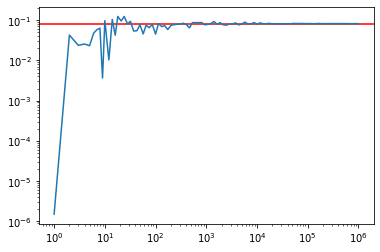

In [9]:
plt.axhline(knownresult(sigma),c='red')
plt.plot(Nvals,results)
plt.loglog()
plt.show()

It converges to the right thing! Nice. Now what's the error?

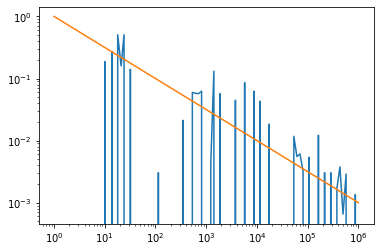

In [10]:
plt.axhline(0,c='red')
plt.plot(Nvals, (results - knownresult(sigma))/knownresult(sigma))
plt.plot(Nvals, Nvals**-0.5)

plt.loglog()
plt.show()

The error goes down as $1/\sqrt N$ as expected

In [12]:
N=1000
realizations = 10000
results = np.array([integral(sigma,N) for i in tqdm(range(realizations))])


  0%|          | 0/10000 [00:00<?, ?it/s]

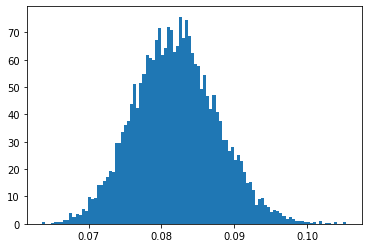

In [13]:
plt.hist(results,density=True, bins=100);

Wow. That looks really gaussian. Fit it with the sample mean and standard deviation

In [14]:
mean = np.average(results)
std = np.std(results, ddof=1)

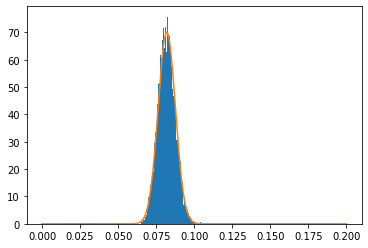

In [15]:
plt.hist(results,density=True, bins=100);
gauss = scipy.stats.norm(loc=mean,scale=std)
x = np.linspace(0,0.2,1000)
plt.plot(x,gauss.pdf(x));